# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:

# Dependencies and Setup
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime
import time

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 580


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# # Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=metric&appid=" + weather_api_key

#How the URL should look like (info only)
# city_url =  f"{url}lat={lats}&lon={lngs}&appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data (***Do we need the params in here?***)
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | port augusta
Processing Record 3 of Set 1 | talnakh
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | hamilton
Processing Record 6 of Set 1 | olonkinbyen
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | udachny
Processing Record 10 of Set 1 | ust-nera
Processing Record 11 of Set 1 | casablanca
Processing Record 12 of Set 1 | amos
Processing Record 13 of Set 1 | minbu
Processing Record 14 of Set 1 | waitangi
Processing Record 15 of Set 1 | port douglas
Processing Record 16 of Set 1 | watford city
Processing Record 17 of Set 1 | pergamino
Processing Record 18 of Set 1 | iqaluit
Processing Record 19 of Set 1 | west island
Processing Record 20 of Set 1 | tabas
Processing Record 21 of Set 1 | tangalle
Processing Record 22 of Set 1 | okhotsk
Processing Record 23 of Set 1 | port

In [5]:
len(city_data)

553

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df
# Show Record Count
# city_data_df.count()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,0.64,76,42,5.30,GS,1712712856
1,port augusta,-32.5000,137.7667,17.97,45,0,5.66,AU,1712713149
2,talnakh,69.4865,88.3972,-24.57,97,97,4.60,RU,1712712867
3,jamestown,42.0970,-79.2353,19.80,52,20,4.12,US,1712712804
4,hamilton,39.1834,-84.5333,16.44,90,100,6.17,US,1712712739
...,...,...,...,...,...,...,...,...,...
548,ciudad lazaro cardenas,17.9583,-102.2000,23.34,78,68,2.51,MX,1712713233
549,happy valley-goose bay,53.3168,-60.3315,-2.83,50,75,5.14,CA,1712712611
550,san andres,12.5847,-81.7006,29.01,74,20,6.69,CO,1712712879
551,amboasary,-25.0333,46.3833,23.70,85,31,2.26,MG,1712713239


In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,0.64,76,42,5.30,GS,1712712856
1,port augusta,-32.5000,137.7667,17.97,45,0,5.66,AU,1712713149
2,talnakh,69.4865,88.3972,-24.57,97,97,4.60,RU,1712712867
3,jamestown,42.0970,-79.2353,19.80,52,20,4.12,US,1712712804
4,hamilton,39.1834,-84.5333,16.44,90,100,6.17,US,1712712739


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,0.64,76,42,5.30,GS,1712712856
1,port augusta,-32.5000,137.7667,17.97,45,0,5.66,AU,1712713149
2,talnakh,69.4865,88.3972,-24.57,97,97,4.60,RU,1712712867
3,jamestown,42.0970,-79.2353,19.80,52,20,4.12,US,1712712804
4,hamilton,39.1834,-84.5333,16.44,90,100,6.17,US,1712712739


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

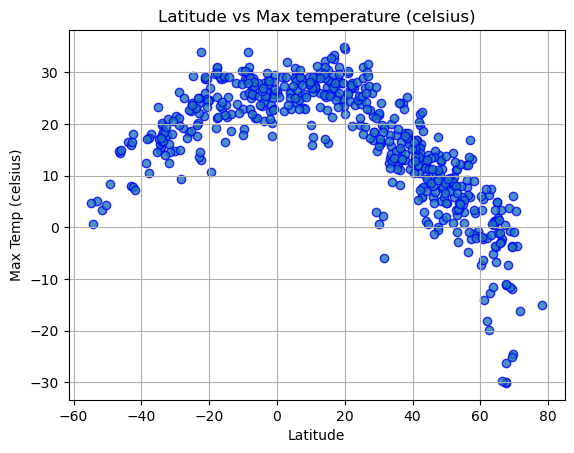

In [10]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_maxtemp = city_data_df["Max Temp"]
plt.scatter(x_values, y_maxtemp, edgecolors="blue", alpha=0.8, label="Cities")

# Incorporate the other graph properties
    #*** This is not working **
plt.grid(True)
plt.title("Latitude vs Max temperature (celsius)")
plt.ylabel("Max Temp (celsius)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.tight_layout
plt.show()

#### Latitude Vs. Humidity

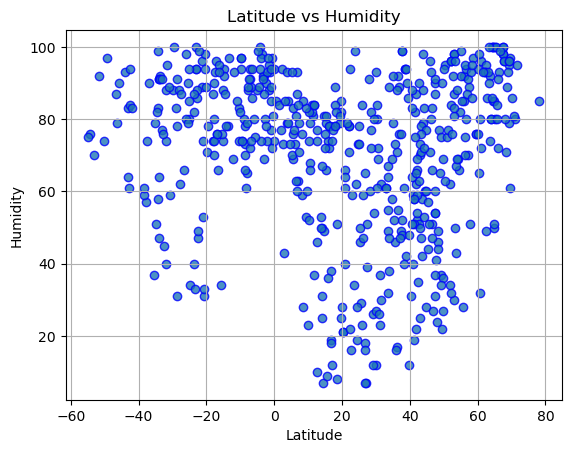

In [11]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_humidity = city_data_df["Humidity"]
plt.scatter(x_values, y_humidity, edgecolors="blue", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.grid(True)
plt.title("Latitude vs Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

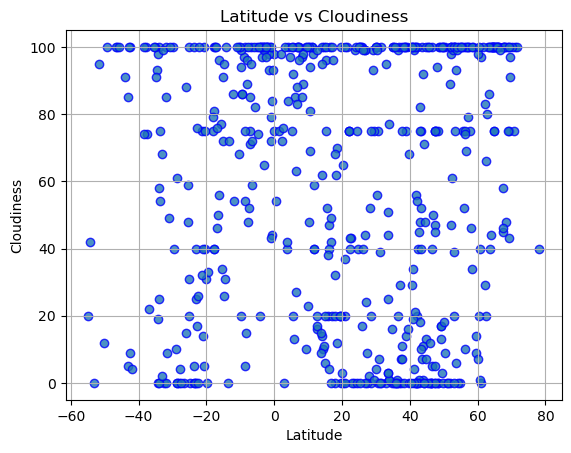

In [12]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_cloud = city_data_df["Cloudiness"]
plt.scatter(x_values, y_cloud, edgecolors="blue", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.grid(True)
plt.title("Latitude vs Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

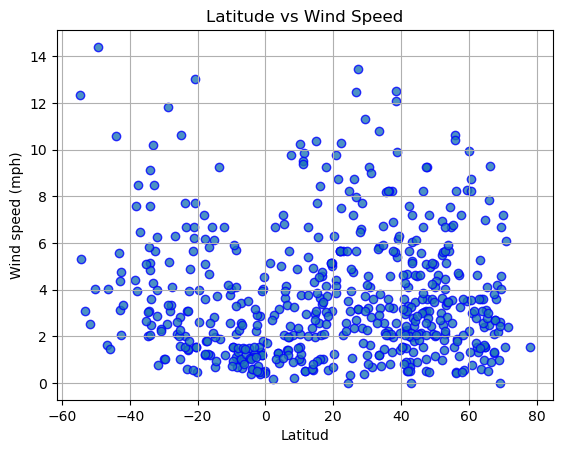

In [13]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_wind = city_data_df["Wind Speed"]
plt.scatter(x_values, y_wind, edgecolors="blue", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.grid(True)
plt.title("Latitude vs Wind Speed")
plt.ylabel("Wind speed (mph)")
plt.xlabel("Latitud")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


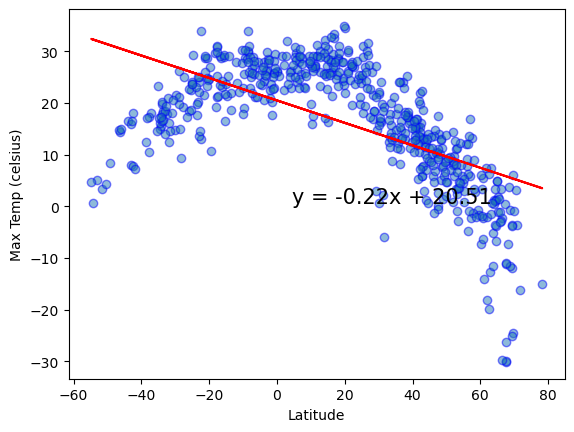

In [71]:
# Create Linear Regression plot for latitude vs. max temperature
x_values = city_data_df["Lat"]
y_maxtemp = city_data_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_maxtemp)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_maxtemp,edgecolors="blue", alpha=0.5, label="Cities")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(4.5,0.7),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (celsius)')

plt.show()

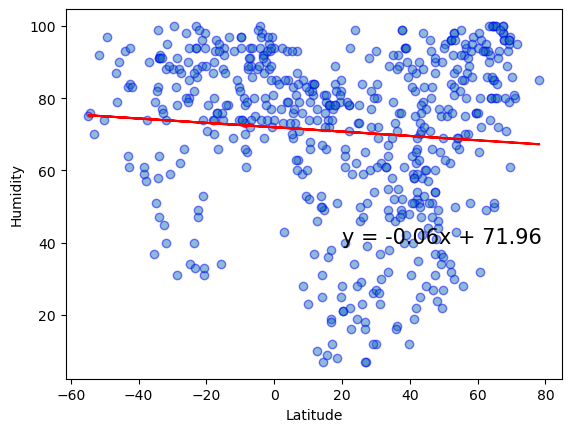

In [73]:
# Create Linear Regression plot for latitude vs. humidity
x_values = city_data_df["Lat"]
y_humidity = city_data_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_humidity)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_humidity,edgecolors="blue", alpha=0.5, label="Cities")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,40),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.show()

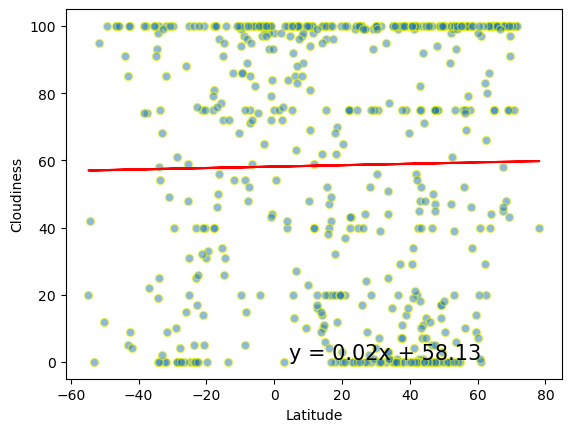

In [74]:
# Create Linear Regression plot for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_cloud = city_data_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_cloud)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_cloud,edgecolors="yellow", alpha=0.5, label="Cities")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(4.5,0.7),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.show()

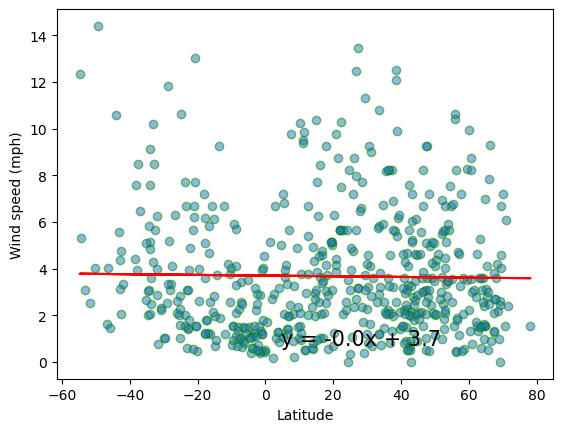

In [75]:
# Create Linear Regression plot for latitude vs. wind
x_values = city_data_df["Lat"]
y_wind = city_data_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_wind)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_wind,edgecolors="green", alpha=0.5, label="Cities")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(4.5,0.7),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Wind speed (mph)')

plt.show()

In [76]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,talnakh,69.4865,88.3972,-24.57,97,97,4.60,RU,1712712867
3,jamestown,42.0970,-79.2353,19.80,52,20,4.12,US,1712712804
4,hamilton,39.1834,-84.5333,16.44,90,100,6.17,US,1712712739
5,olonkinbyen,70.9221,-8.7187,-3.62,80,100,6.09,SJ,1712713150
6,albany,42.6001,-73.9662,16.07,51,45,0.89,US,1712713150


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,0.64,76,42,5.30,GS,1712712856
1,port augusta,-32.5000,137.7667,17.97,45,0,5.66,AU,1712713149
7,punta arenas,-53.1500,-70.9167,5.06,70,0,3.09,CL,1712713071
13,waitangi,-43.9535,-176.5597,16.57,93,91,10.58,NZ,1712712856
14,port douglas,-16.4833,145.4667,28.74,66,50,4.65,AU,1712713035


###  Temperature vs. Latitude Linear Regression Plot - Northern Hemisphere

In [20]:
# I tried to define a function for this step but all r values were the same, so this was an error that I could not fixed. The challenge says "you might finde it helpful" so i understood it was not
#mandatory. It was more important to get the information right. I decided to leave my code wit herror as comments, just to demonstrate that I tried as much as I could to make it work.
# #Define a function to create linear regression plots
# def linear_reg(x_values, y_values, title, y_label):
#     (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
#     regress_values = x_values * slope + intercept
#     line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#     plt.scatter(x_values,y_values)
#     plt.plot(x_values,regress_values,"r")
#     plt.annotate(line_eq,(5.8,0.8),fontsize=12,color="black")
#     plt.title(title)
#     plt.xlabel("Latitude")
#     plt.ylabel(y_label)
#     print(f"The r-value is: {rvalue**2}")
#     plt.show

The r-value is: 0.7457514023426549


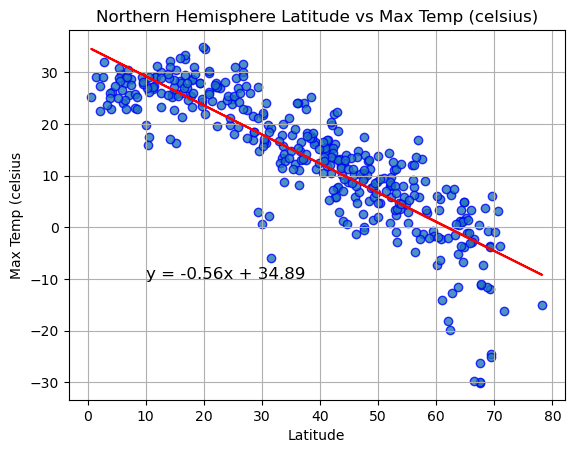

In [56]:
#Build scatter plot for latitude vs. temperature for Northern Hemisphere
#Put the linear regression parameters.
(slope, intercept, r_value, p_value, std_err) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Build the Scatter Plot completely
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], edgecolors="blue", alpha=0.8)
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(10,-10),fontsize=12,color="black")
plt.title("Northern Hemisphere Latitude vs Max Temp (celsius)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (celsius")
print(f"The r-value is: {r_value**2}")
plt.grid(True)
plt.show()


###  Temperature vs  Latitude Linear Regression Plot - Southern Hemisphere

The r-value is: 0.542300470889554


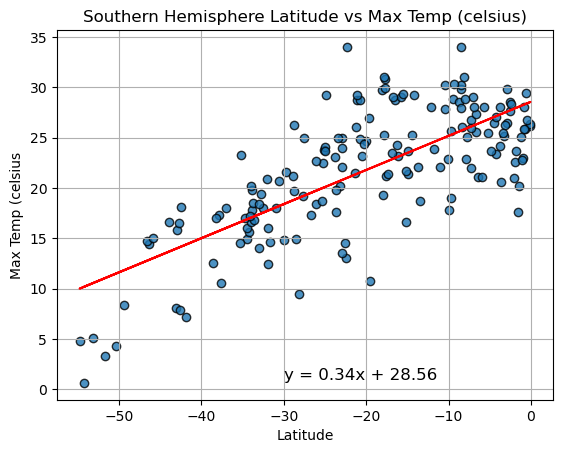

In [57]:
# Build scatter plot for latitude vs. temperature for Southern Hemisphere
(slope, intercept, r_value, p_value, std_err) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], edgecolors="black", alpha=0.8)
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-30,1),fontsize=12,color="black")
plt.title("Southern Hemisphere Latitude vs Max Temp (celsius)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (celsius")
print(f"The r-value is: {r_value**2}")
plt.grid(True)
plt.show()

**Discussion about the linear relationship:** These are very fascinating graphs to look at. From the equator line to the south, we have a somewhat linear negative regression which indicates that it gets colder once you start going to the opposite direction. This is not an exact linear trend because R is showing only 0.54. Temperature is also defined by the geography of the place you are looking at such as mountain ranges, forests, cities, etc. Therefore, the relation is not 100% lineal. To judge by the R results on the Northern Hemisphere, I identify that the conditions of the places analyzed in the northern hemisphere are less diverse, therefore we can see a stronger correlation between location and temperature.

###  Temperature vs. Humidity Linear Regression Plot - Northern Hemisphere

The r-value is: 0.07074820590003318


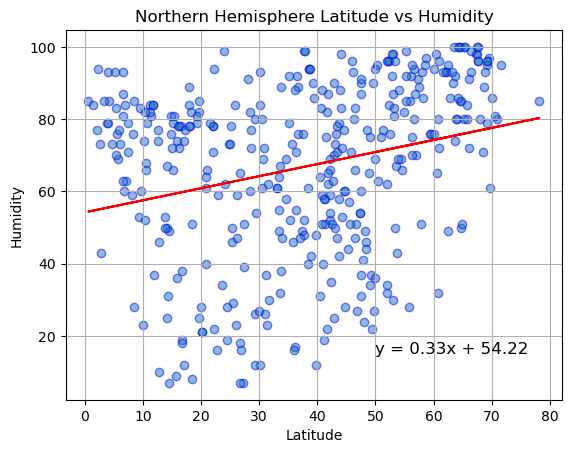

In [58]:
#Build scatter plot for latitude vs. humidity for Northern Hemisphere
#Put the linear regression parameters.
(slope, intercept, r_value, p_value, std_err) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Build the Scatter Plot completely
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], edgecolors="blue", alpha=0.5)
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(50,15),fontsize=12,color="black")
plt.title("Northern Hemisphere Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {r_value**2}")
plt.grid(True)
plt.show()


###  Temperature vs. humidity Linear Regression Plot - Southern Hemisphere

The r-value is: 0.039619334274336865


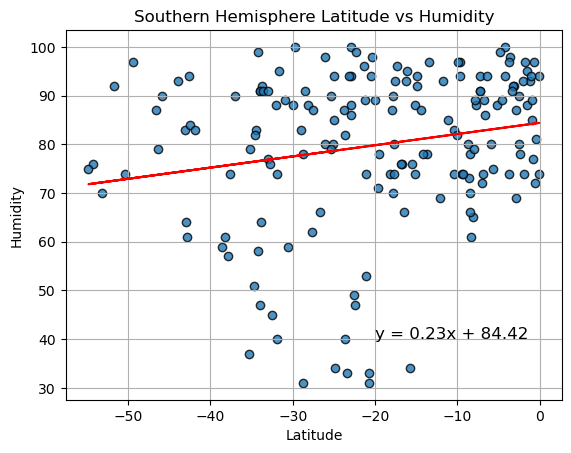

In [48]:
# Build scatter plot for latitude vs. humidity for Southern Hemisphere
(slope, intercept, r_value, p_value, std_err) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], edgecolors="black", alpha=0.8)
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-20,40),fontsize=12,color="black")
plt.title("Southern Hemisphere Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {r_value**2}")
plt.grid(True)
plt.show()

**Discussion about the linear relationship:** r value in both graphs is very low, which indicates that there is not a linear relationship between latitude vs humidity. THe Southern hemisphere shows a little bit more concentration of humidity when it is closer to the equatorian line, but not extrict. 

###  Temperature vs. Cloud Linear Regression Plot - Northern Hemisphere

The r-value is: 0.009663632704733536


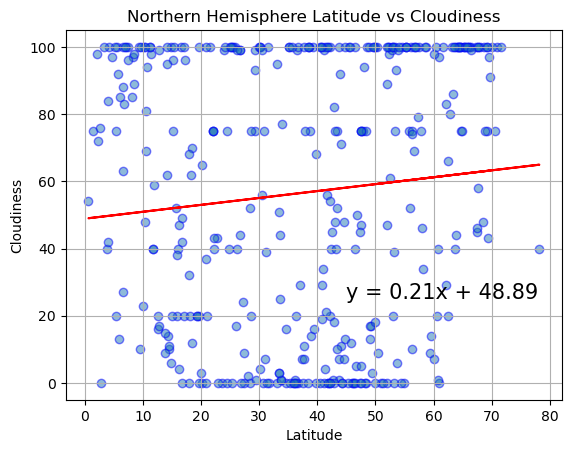

In [61]:
#Build scatter plot for latitude vs. Cloudiness for Northern Hemisphere
#Put the linear regression parameters.
(slope, intercept, r_value, p_value, std_err) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Build the Scatter Plot completely
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], edgecolors="blue", alpha=0.5)
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(45,25),fontsize=15,color="black")
plt.title("Northern Hemisphere Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is: {r_value**2}")
plt.grid(True)
plt.show()


###  Temperature vs. Cloud Linear Regression Plot - Southern Hemisphere

The r-value is: 0.08796373719136014


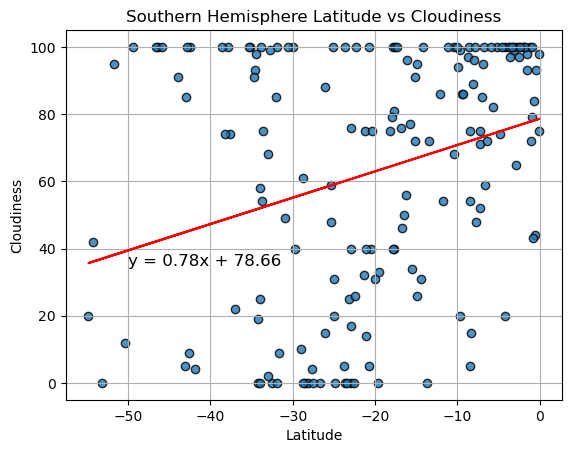

In [67]:
# Build scatter plot for latitude vs. Cloudiness for Southern Hemisphere
(slope, intercept, r_value, p_value, std_err) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], edgecolors="black", alpha=0.8)
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-50,35),fontsize=12,color="black")
plt.title("Southern Hemisphere Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is: {r_value**2}")
plt.grid(True)
plt.show()

**Discussion about the linear relationship:** r value in both graphs is very low, which indicates that there is not a linear relationship between latitude vs cloudiness.  

###  Temperature vs. wind Linear Regression Plot - Northern Hemisphere

The r-value is: 0.0018459624541157604


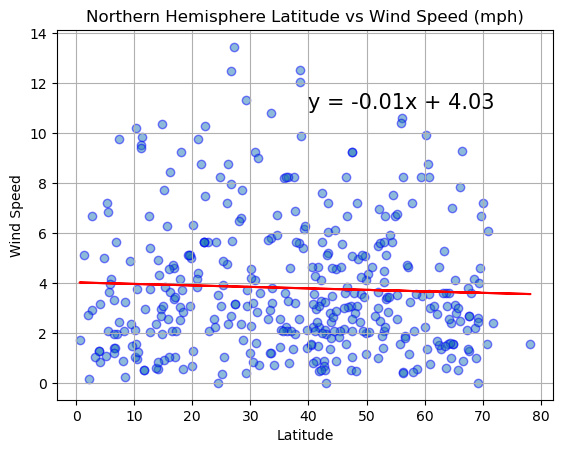

In [68]:
#Build scatter plot for latitude vs. Wind for Northern Hemisphere
#Put the linear regression parameters.
(slope, intercept, r_value, p_value, std_err) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Build the Scatter Plot completely
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], edgecolors="blue", alpha=0.5)
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(40,11),fontsize=15,color="black")
plt.title("Northern Hemisphere Latitude vs Wind Speed (mph)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is: {r_value**2}")
plt.grid(True)
plt.show()

###  Temperature vs. Wind Linear Regression Plot - Southern Hemisphere

The r-value is: 0.19483220024007955


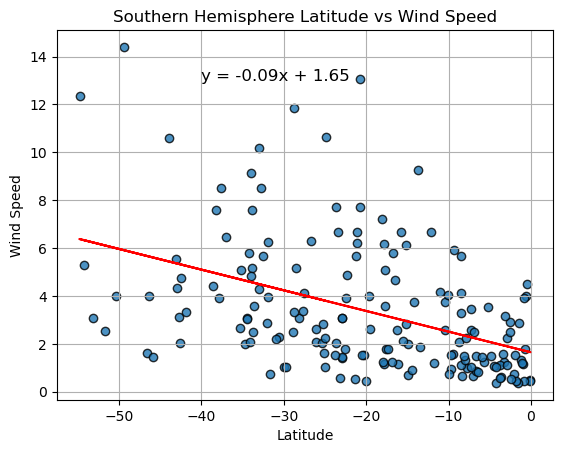

In [70]:
# Build scatter plot for latitude vs. Wind Speed for Southern Hemisphere
(slope, intercept, r_value, p_value, std_err) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], edgecolors="black", alpha=0.8)
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-40,13),fontsize=12,color="black")
plt.title("Southern Hemisphere Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is: {r_value**2}")
plt.grid(True)
plt.show()

**Discussion about the linear relationship:** r value in both graphs is very low, which indicates that there is not a linear relationship between latitude vs Wind Speed. The Southern hemisphere shows a little bit more concentration of wind when it is closer to the equatorian line, but not in high speed, so the linear regression is not the right method to see it's trend because we can't make conclusions based on the results that are shown.